<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/citaty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import requests

Сохранияем html код с перых 3 (можно поменять на большее кол-во при желании) страниц сайта

In [17]:
url = 'https://citaty.info/man?page='
sites = ''
for i in range(3):
  sites += requests.get(url + str(i)).text

In [18]:
from bs4 import BeautifulSoup

In [19]:
soup = BeautifulSoup(sites, "html.parser")

Выделяем большие компоненты, содержащие всю необходимую статистику по цитатам

In [20]:
quotes = soup.findAll('article')
print(len(quotes))

48


После анализа сайта через Код страницы (f12) для каждого выделенного нами параметра (Текст цитаты, её автор, теги и рейтинг) создаём подходящий запрос
С тегами отдельная история получилась, там есть обработчик, на случай, если их нет + их может быть несколько

In [21]:
text = []
author = []
tags = []
rating = []
for item in quotes:
  text.append(item.div.div.div.div.p.text.replace('\xa0', ' '))
  author.append(item.find('div', class_='field field-name-taxonomy-vocabulary-3 field-type-taxonomy-term-reference field-label-hidden').div.div.a.text)
  tg = item.find('div', class_='node__topics')
  tags.append([])
  if tg is not None:
    tg = tg.findAll('div', class_='field-items')
    for i in tg:
      tags[-1] += list(map(lambda x: x.text, i.findAll('a')))
  rating.append(int(item.find('div', class_='rating__value__digits').text.strip('\n ')))


In [22]:
import pandas as pd

In [23]:
data = pd.DataFrame({
    'Text': text,
    'Author': author,
    'Tags': tags,
    'Rating': rating
})
data.head()

,Text,Author,Tags,Rating
0,"Мир полон волшебных вещей, терпеливо ожидающих...",Уильям Батлер Йейтс,"[мир, мироздание]",10
1,Живая жизнь не может быть определена никаким к...,Викентий Викентьевич Вересаев,"[мудрые цитаты, жизнь, добро, борьба, смысл жи...",19
2,"У всех у нас есть страхи. Но у тех, кто смотри...",Эрнест Хемингуэй,"[цитаты со смыслом, смелость, храбрость, страх]",23
3,"Не тот твой друг, кто за столом с тобою пьёт,\...",Омар Хайям,"[мудрые цитаты, друзья, дружба, верность]",11
4,​​Самые прекрасные мгновения всегда полны грус...,Андре Моруа,"[жизненные цитаты, печаль, мгновение, момент]",14


In [24]:
import matplotlib.pyplot as plt
import statistics

In [25]:
print('Средний рейтинг цитат:', statistics.mean(data['Rating']))

Средний рейтинг цитат: 13.875


In [34]:
print('Самые популярные авторы цитат:')
print(data['Author'].value_counts().head())

Самые популярные авторы цитат:
Оскар Уайльд                    5
Альберт Эйнштейн                4
Михаил Сафарбекович Гуцериев    4
Виктор Гюго                     2
Фёдор Михайлович Достоевский    2
Name: Author, dtype: int64


Считаем количество встретившихся тего и сколько раз они встретились

In [28]:
tags = []
count = []
for items in data['Tags']:
  for item  in items:
    if item in tags:
      count[tags.index(item)] += 1
    else:
      tags.append(item)
      count.append(1)
print(len(tags), tags)
print(len(count), count)

87 ['мир, мироздание', 'мудрые цитаты', 'жизнь', 'добро', 'борьба', 'смысл жизни', 'цитаты со смыслом', 'смелость, храбрость', 'страх', 'друзья, дружба', 'верность', 'жизненные цитаты', 'печаль', 'мгновение, момент', 'цитаты на английском с переводом', 'нелепость', 'искания', 'совершенство', 'ум, интеллект', 'сердце', 'слезы', 'утешение', 'логика', 'слова', 'вред', 'улыбка', 'грустные цитаты', 'желания', 'мечта', 'мотивирующие цитаты', 'молодость, юность', 'образование', 'человек, люди', 'существование', 'мать', 'вера', 'религия, церковь', 'спор', 'разочарование', 'счастье', 'мудрость', 'жизненный опыт', 'любовь', 'смерть', 'возраст', 'одиночество', 'величие', 'ад', 'дьявол, сатана', 'красота', 'природа', 'будущее', 'вдохновляющие цитаты', 'уединение', 'везение, удача', 'саморазвитие и самосовершенствование', 'православие', 'Бог', 'истина', 'мужчина и женщина', 'рай', 'государство', 'душа', 'глаза', 'работа', 'искусство', 'жизненная позиция', 'личность', 'собаки', 'преданность', 'враги

Теги, которые встречаются меньше 3 (тоже можете выставить по своему желанию, если будете увеличивать кол-во счиитываемых страниц, то точно надо будет поменять) раз, переносим в раздел остальные

In [29]:
tags2 = ['другие']
count2 = [0]
for i in range(len(count)):
  if count[i] < 3:
    count2[0] += count[i]
  else:
    tags2.append(tags[i])
    count2.append(count[i])
print(tags2)
print(count2)

['другие', 'мудрые цитаты', 'жизнь', 'цитаты со смыслом', 'жизненные цитаты', 'цитаты на английском с переводом', 'ум, интеллект', 'грустные цитаты', 'вера']
[94, 6, 6, 8, 10, 7, 4, 4, 3]


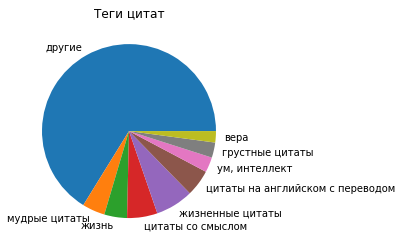

In [30]:
plt.title('Теги цитат')
plt.pie(count2, labels=tags2)
plt.show()